![header](https://i.imgur.com/I4ake6d.jpg)

# COPERNICUS MARINE IN SITU ARCTIC TRAINING (3/5)

<div style="text-align: right"><i> 13-03-Part-three-out-of-five </i></div>

***
# ARC `NRT` product/dataset: managing files (moorings)

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

<h1>Table of Contents<span class="tocSkip"></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction">1. Introduction</a></span></li>
        <li>
            <span><a href="#2.-Setup" data-toc-modified-id="2.-Setup">2. Setup</a></span>
            <ul>
                <li><span><a href="#2.1.-Python-packages" data-toc-modified-id="2.1.-Python-packages">2.1. Python packages</a></span></li>
            </ul>
        </li>
        <li><span><a href="#3.-Moorings-(MO)-data" data-toc-modified-id="3.-Moorings-(MO)-data">3. Moorings (MO) data</a></span>
            <ul>
                <li><span><a href="#3.1.-Reading-file" data-toc-modified-id="3.1.-Reading-file">3.1. Reading file</a></span></li>
                <li><span><a href="#3.2.-Subsetting-Operations" data-toc-modified-id="3.2.-Subsetting-Operations">3.2. Subsetting Operations</a></span>
                <li><span><a href="#3.3.-Sampling-Operations" data-toc-modified-id="3.3.-Sampling-Operations">3.3. Sampling Operations</a></span>
                    <ul>
                        <li><span><a href="#3.3.1.-Selecting-Good-data-(QC-flags)" data-toc-modified-id="3.3.1.-Selecting-Good-data-(QC-flags)">3.3.1. Selecting Good data (QC flags)</a></span></li>
                        <li><span><a href="#3.3.2.-Upsampling/Downsampling" data-toc-modified-id="3.3.2.-Upsampling/Downsampling">3.3.2. Upsampling/Downsampling</a></span></li>
                    </ul>
                </li>
        <li><span><a href="#3.4.-Exporting-data-to-csv" data-toc-modified-id="3.4.-Exporting-data-to-csv">3.4. Exporting data to csv</a></span></li>
            </ul>
        </li>
        <li><span><a href="#4.-Wrap-up" data-toc-modified-id="4.-Wrap-up">4. Wrap-up</a></span></li>
    </ul>
</div>

***

## 1. Introduction
[Go back to the "Table of Contents"](#Table-of-Contents)

According to the [13-01-NearRealTtime-product-collections-overview.ipynb](13-01-NearRealTtime-product-collections-overview.ipynb) one of the data source types available are the Moorings. Please use the notebook [13-02-NearRealTtime-product-subsetting-download](13-02-NearRealTtime-product-subsetting-download.ipynb) to download some files from Moorings ('MO' data type) and let's check its data. If you wanna skip the downloading part you can use the netCDF files available at the `/data/nc_files/MO` folder instead.  

## 2. Setup
[Go back to the "Table of Contents"](#Table-of-Contents)

### 2.1. Python packages

For the notebook to properly run we need to first load the next packages available from the Jupyter Notebook Ecosystem. Please run the `next cell`:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import IPython
import datetime
import pandas as pd
import os
import xarray
import matplotlib.pyplot as plt
import folium
from functools import reduce
from IPython.display import YouTubeVideo
%matplotlib inline

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If any of them raises any error it means you need to install the module first. For doing so please:
1. Open a new cell in the notebook
2. Run <i>`!conda install packageName --yes`</i> or <i>`!conda install -c conda-forge packageName --yes`</i> or <i>`!pip install packageName`</i>
3. Import again!
<br><br>
Example: <i>how-to-solve import error for json2html module </i>

![region.png](img/errorImporting.gif)

## 3. Moorings (MO) data
[Go back to the "Table of Contents"](#Table-of-Contents)

Moorings are fixed platforms measuring certain oceanographic parameters (i.e wave heigh, temperature, salinity etc) over time.<br>
See next a clip from the MMSA (Maine Mathematics and Science Alliance) explaining how exaclty these platforms looks, works and are deployed: `run the next cell`

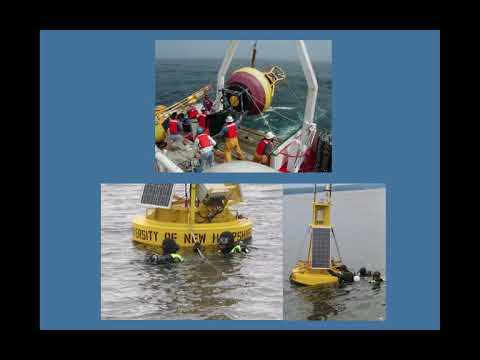

In [2]:
YouTubeVideo('muDfOceW4pA', width="100%", height=500, start=83, end=237)

Let's see the data reported by one of the available Moorings in the ARC region. 

### 3.1. Reading file

`Run the next cell` to see the Mooring files already available in the `/data/nc_files/MO` folder:

In [3]:
dir_MO = os.path.join(os.getcwd(),'data','nc_files','MO') 
os.listdir(dir_MO)

['AR_TS_MO_Gardskagadufl.nc',
 'AR_TS_MO_Kogurdufl.nc',
 'AR_TS_MO_Reykjavik.nc',
 'AR_TS_MO_Grindavikurdufl.nc',
 'AR_TS_MO_Blakksnes.nc',
 'AR_TS_MO_Hornafjardardufl.nc',
 'AR_TS_MO_Flateyjardufl.nc',
 'AR_TS_MO_Straumnesdufl.nc',
 'AR_TS_MO_Grimsey.nc',
 'AR_TS_MO_Grimseyjarsund.nc']

`Set one` of the above available `file name` and `run the next cells`:

In [4]:
file = 'AR_TS_MO_Grindavikurdufl.nc'
path = os.path.join(dir_MO, file)

In [5]:
ds = xarray.open_dataset(path)
ds.close()
ds

<xarray.Dataset>
Dimensions:      (DEPTH: 1, LATITUDE: 41784, LONGITUDE: 41784, POSITION: 41784, TIME: 41784)
Coordinates:
  * TIME         (TIME) datetime64[ns] 2015-03-10T12:00:00 ... 2019-12-31T23:...
  * LATITUDE     (LATITUDE) float32 63.81 63.81 63.81 ... 63.81 63.81 63.81
  * LONGITUDE    (LONGITUDE) float32 -22.46 -22.46 -22.46 ... -22.46 -22.46
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC      (TIME) float32 ...
    POSITION_QC  (POSITION) float32 ...
    DEPH         (TIME, DEPTH) float32 ...
    DEPH_QC      (TIME, DEPTH) float32 ...
    VGHS         (TIME, DEPTH) float64 ...
    VTZA         (TIME, DEPTH) float64 ...
    VGHS_QC      (TIME, DEPTH) float32 ...
    VTZA_QC      (TIME, DEPTH) float32 ...
Attributes:
    title:                          Arctic- NRT in situ Observations
    qc_manual:                      OceanSITES User's Manual v1.2
    contact:                        datahjelp@imr.no
    format_version:                 1.2
    distribution_statement:         These data follow Copernicus standards; t...
    citation:                       These data were collected and made freely...
    naming_authority:               OceanSITES
    data_assembly_center:           Norwegian Marine Datacenter
    update_interval:                void
    area:                           Arctic Ocean
    author:                         
    Conventions:                    CF-1.6 OceanSITES-Manual-1.2 Cpernicus-Ma...
    data_mode:                      M
    comment:                        
    history:                        
    references:                     http://marine.copernicus.eu http://www.co...
    netcdf_version:                 netCDF-4 classic model
    doi:                            
    platform_code:                  Grindavikurdufl
    platform_name:                  Grindavikurdufl
    institution:                    Icelandic Road and Coastal Administration...
    institution_edmo_code:          3899
    source:                         mooring
    institution_references:         http://www.vegagerdin.is
    source_platform_category_code:  48
    pi_name:                        Greipur Sigurdsson
    data_type:                      OceanSITES time-series data
    cdm_data_type:                  Time-series profile
    id:                             AR_TS_MO_Grindavikurdufl
    time_coverage_start:            2015-03-10T12:00:00Z
    time_coverage_end:              2019-12-31T23:01:59Z
    last_date_observation:          2019-12-31T23:01:59Z
    date_update:                    2020-11-17T10:47:14Z
    geospatial_lat_min:             63.813
    geospatial_lat_max:             63.813
    last_latitude_observation:      63.813
    geospatial_lon_min:             -22.460
    geospatial_lon_max:             -22.460
    last_longitude_observation:     -22.460
    geospatial_vertical_min:        0.000
    geospatial_vertical_max:        0.000
    quality_control_indicator:      1
    quality_index:                  A

The above one is an overview of the content of the file: variables, dimensions, coordinates, global attributes...
<br>i.e we are able to know already the platform last position. Let's draw it on a map: `run the next cell`

In [6]:
m = folium.Map(
    location=[float(ds.attrs['last_latitude_observation']),float(ds.attrs['last_longitude_observation'])],
    zoom_start=6
)
tooltip = ds.platform_code
folium.Marker([float(ds.last_latitude_observation), float(ds.last_longitude_observation)], tooltip=tooltip).add_to(m)
m

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If you do not see any map when running the next cell please change your navigator (try chrome!).

<br>Let's list now the available variables: `run the next cell`

In [7]:
for var in ds.variables:
    print(var + ':' + ds[var].attrs['long_name'])

TIME:Time
TIME_QC:quality flag
LATITUDE:Latitude of each location
LONGITUDE:Longitude of each location
POSITION_QC:quality flag
DEPH:Depth
DEPH_QC:quality flag
VGHS:Generic significant wave height (Hs)
VTZA:Average zero crossing wave period (Tz)
VGHS_QC:quality flag
VTZA_QC:quality flag


Let's focus on one of the above parameters `run the next cell` to see its attributes:

In [8]:
param = 'VTZA'
ds[param][:,0]

<xarray.DataArray 'VTZA' (TIME: 41784)>
array([6.5, 6. , 6.4, ..., 8.5, 8.9, 8.5])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2015-03-10T12:00:00 ... 2019-12-31T23:01:59
Attributes:
    standard_name:  sea_surface_wave_mean_period
    long_name:      Average zero crossing wave period (Tz)
    units:          s
    valid_min:      2000
    valid_max:      25000
    data_mode:      R

Let's have  a look to the whole parameter time serie: `run the next cell`

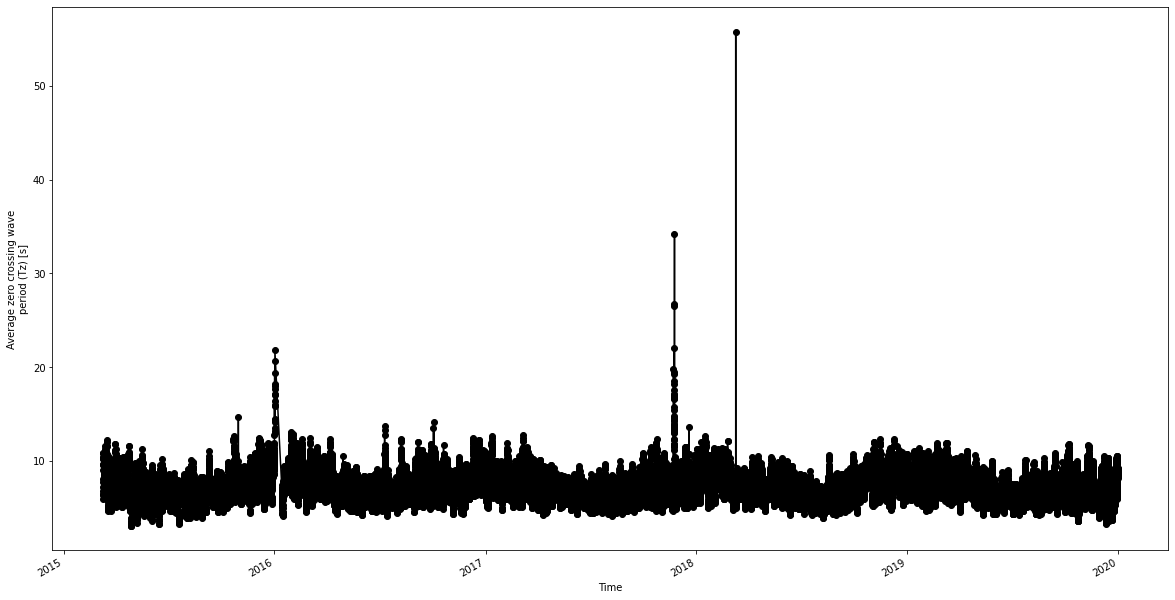

In [9]:
ds[param][:,0].plot(aspect=2, size=10, color='k', marker='o')

# Would you like to save the figure?: Uncomment the next lines
#figure_name = param+'-'+ds.id+'.png'
#plt.savefig(figure_name) #check the documentation on 'savefig' if more quality needed: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.savefig.html 

### 3.2. Subsetting Operations

Let's select a specific time range:

In [10]:
start = '2018-01-01'
end = '2018-06-15'

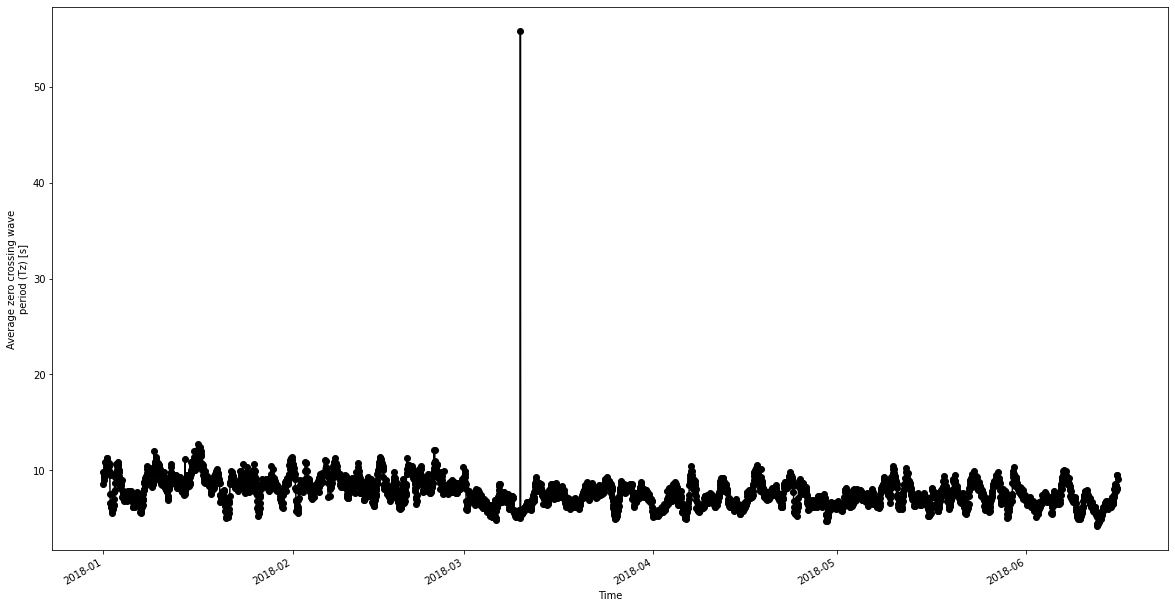

In [11]:
subset = ds[param][:,0].sel(TIME=slice(start, end))
subset.plot(aspect=2, size=10, color='k', marker='o')

### 3.3. Sampling Operations

We will upsample and downsample the above serie subset, not the original one, to better see the diferences.

#### 3.3.1. Selecting Good data (QC flags)

All In Situ TAC variables are linked to another called the same plus '_QC'. This 'twin' variable contains a quality flag for each value in the paired variable. <br>
Let's check all posible 'QC' values: `run the next cell`

In [12]:
pd.DataFrame(data=ds[param+'_QC'][:,0].attrs['flag_values'],
             index=ds[param+'_QC'][:,0].attrs['flag_meanings'].split(' '), 
             columns=['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


From the above list, users are recommended to use only the data flagged as 1 (if qc performed); so that, when working with any of the variables, we will perfom first a data cleaning to use only the 'good data' to be safe. 

Is there any bad data in the above time serie? `Run the next cell`to check the quality flags assigned to the parameter:

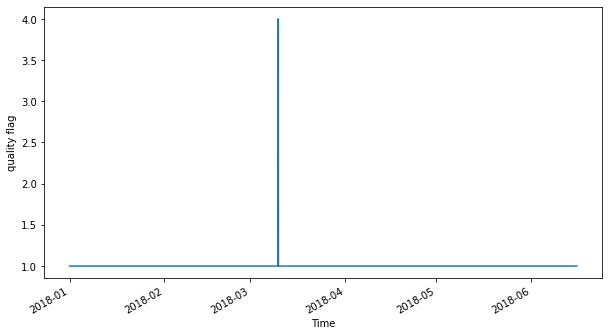

In [13]:
subset_QC = ds[param+'_QC'][:,0].sel(TIME=slice(start, end))
subset_QC.plot(aspect=2, size=5)

In the event of seeing values different from 0 (Quality Tests on data avaialable), users shall retain only those values equal to 1 ('good' data). <br>See next how to do this: `run the next cells`

In [14]:
subset_good = subset.where(subset_QC == 1)

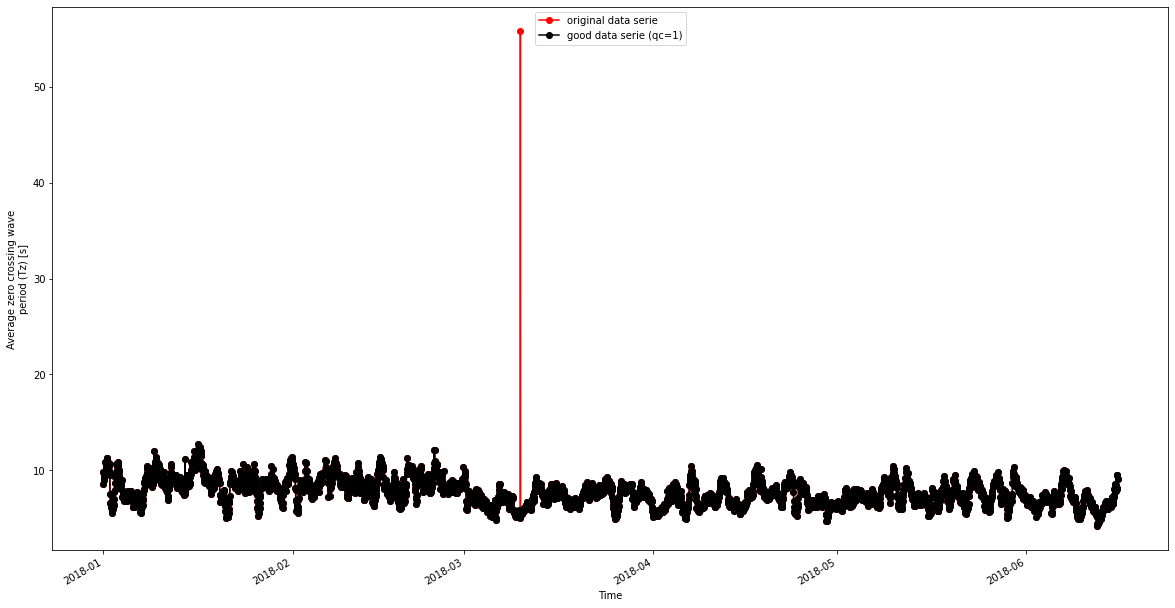

In [16]:
subset.plot(aspect=2, size=10, color='r', marker='o', label='original data serie')
subset_good.plot(color='k', marker='o', label='good data serie (qc=1)')
plt.legend(loc='upper center')

#### 3.3.2. Upsampling/Downsampling

<ul> <li>Downsamplig </li></ul>
Let's see next a downsampling example; this is, retrieving less observations in a given period by agregating somehow <i>i.e mean of the original number of observations</i>. Let's get, by averaging, a weekly resolution sampling: `run the next cell`

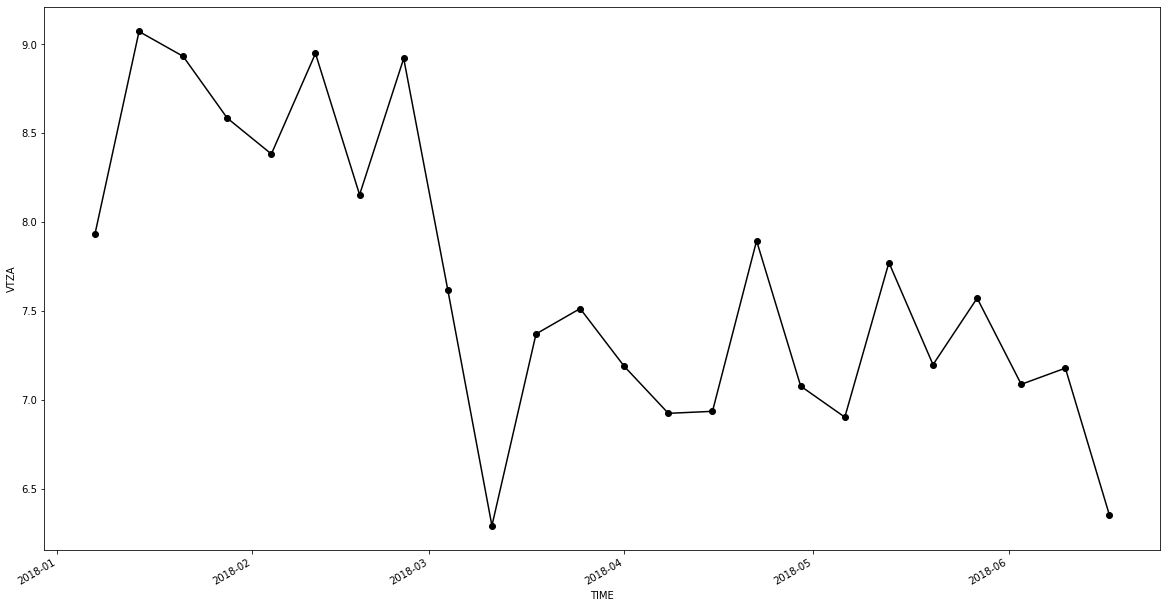

In [17]:
(subset_good.resample(TIME='1w').mean()).plot(aspect=2, size=10, color='k', marker='o')

<ul><li>Upsampling</ul></li>

Let's see next an upsampling example; this is, retrieving more observations in a given period by inferring new ones some-how i.e <i>interpolating the original number of observations</i>. Let's get, by interpolating, a 0.5 minute resolution instead:

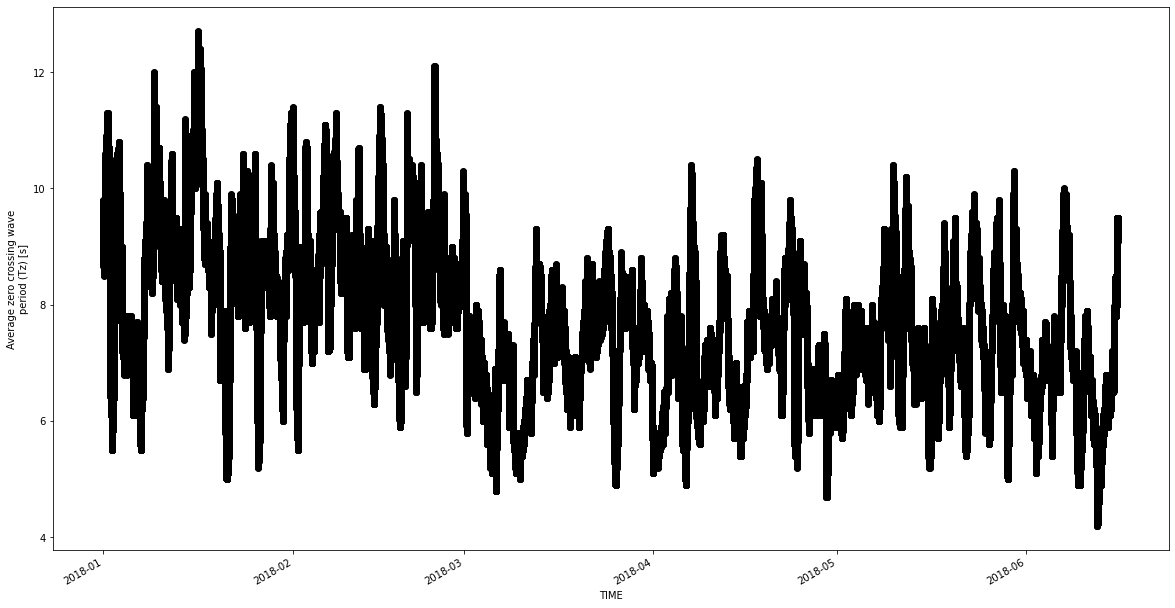

In [18]:
(subset_good.resample(TIME='0.5Min').interpolate('linear')).plot(aspect=2, size=10, color='k', marker='o')

### 3.4. Exporting data to csv

Let's export the full serie to csv.

1) `run the next cell` to create the parameter and parameterQC dataframes:

In [19]:
param_dataframe = ds[param][:,0].to_dataframe()
paramQC_dataframe = ds[param+'_QC'][:,0].to_dataframe()

2) `run the next cell` to combine both into one single dataframe:

In [20]:
buffer = [param_dataframe, paramQC_dataframe]
df =  reduce(lambda left,right: left.join(right, on='TIME'), buffer)
df.transpose()

TIME,2015-03-10 12:00:00.000000000,2015-03-10 13:00:00.000000000,2015-03-10 14:00:00.000000000,2015-03-10 15:00:00.000000000,2015-03-10 16:00:00.000000000,2015-03-10 17:00:00.000000000,2015-03-10 18:00:00.000000000,2015-03-10 19:00:00.000000000,2015-03-10 20:00:00.000000000,2015-03-10 21:00:00.000000000,...,2019-12-31 18:31:59.000000000,2019-12-31 19:01:59.999999744,2019-12-31 19:31:58.999999744,2019-12-31 20:01:59.000000000,2019-12-31 20:31:59.999999744,2019-12-31 21:01:58.999999744,2019-12-31 21:31:59.000000000,2019-12-31 22:01:59.999999744,2019-12-31 22:31:58.999999744,2019-12-31 23:01:59.000000000
VTZA,6.5,6.0,6.4,6.8,7.2,8.1,7.8,9.0,9.6,10.3,...,9.3,8.9,9.1,8.7,8.7,8.7,8.9,8.5,8.9,8.5
VTZA_QC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0


3) `run the next cell` to re-format a bit the TIME pattern:

In [21]:
df.index = df.index.map(lambda ts: ts.strftime("%d-%m-%Y %H"))
df.index.name = 'TIME'
df.transpose()

TIME,10-03-2015 12,10-03-2015 13,10-03-2015 14,10-03-2015 15,10-03-2015 16,10-03-2015 17,10-03-2015 18,10-03-2015 19,10-03-2015 20,10-03-2015 21,...,31-12-2019 18,31-12-2019 19,31-12-2019 19,31-12-2019 20,31-12-2019 20,31-12-2019 21,31-12-2019 21,31-12-2019 22,31-12-2019 22,31-12-2019 23
VTZA,6.5,6.0,6.4,6.8,7.2,8.1,7.8,9.0,9.6,10.3,...,9.3,8.9,9.1,8.7,8.7,8.7,8.9,8.5,8.9,8.5
VTZA_QC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0


4) Exporting dataframe to csv: `run the next cells`!

In [22]:
out_put_dir = os.getcwd() #by default: current working directory. Set a different path if you want

In [23]:
file_name = ds.attrs['id']+'.csv'
file_name

'AR_TS_MO_Grindavikurdufl.csv'

In [24]:
df.to_csv(os.path.join(out_put_dir, file_name))

<div class="alert alert-block alert-info" style="margin-left: 2em">
<b>TIP</b>
    
***  
Check your output directory for the file exported and inspect the content!.

---



## 4. Wrap-up
[Go back to the "Table of Contents"](#Table-of-Contents)

So far you should already know how to deal with Time Series data from fixed platforms (moorings, tide gauges, river flows...).<br> `If you don't please ask us! it is the moment!`